
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [2]:
## library imports here
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from plotnine import *

In [3]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


In [4]:
# kNN

y = ha['cp']

X = ha.drop(columns=['cp'])

Xt, Xv, yt, yv = train_test_split(X, y, test_size=0.2, random_state=42)


knn = Pipeline([
    ('scaling', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

grid = {
    'knn__n_neighbors': [3,5,7,9,11],
    'knn__weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(knn, grid, cv=5, scoring='accuracy')
grid_knn.fit(Xt, yt)


print(grid_knn.best_params_)

knn_pred = grid_knn.predict(Xv)
print('knn accuracy', accuracy_score(yv, knn_pred))
print('classification report', classification_report(yv, knn_pred))

{'knn__n_neighbors': 7, 'knn__weights': 'uniform'}
knn accuracy 0.509090909090909
classification report               precision    recall  f1-score   support

           0       0.57      0.88      0.70        26
           1       0.50      0.17      0.25        12
           2       0.33      0.20      0.25        15
           3       0.00      0.00      0.00         2

    accuracy                           0.51        55
   macro avg       0.35      0.31      0.30        55
weighted avg       0.47      0.51      0.45        55



In [5]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 42)

tree_grid = {
    'max_depth': [3,5,7,9,11],
    'min_samples_split': [2,3,4],
    'criterion': ['gini', 'entropy']
}

grid_tree = GridSearchCV(tree, tree_grid, cv=5, scoring='accuracy')
grid_tree.fit(Xt, yt)


y_pred = grid_tree.predict(Xv)
print('tree accuracy', accuracy_score(yv, y_pred))
print('classification report', classification_report(yv, y_pred))

tree accuracy 0.5454545454545454
classification report               precision    recall  f1-score   support

           0       0.69      0.69      0.69        26
           1       0.00      0.00      0.00        12
           2       0.46      0.73      0.56        15
           3       0.20      0.50      0.29         2

    accuracy                           0.55        55
   macro avg       0.34      0.48      0.39        55
weighted avg       0.46      0.55      0.49        55



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


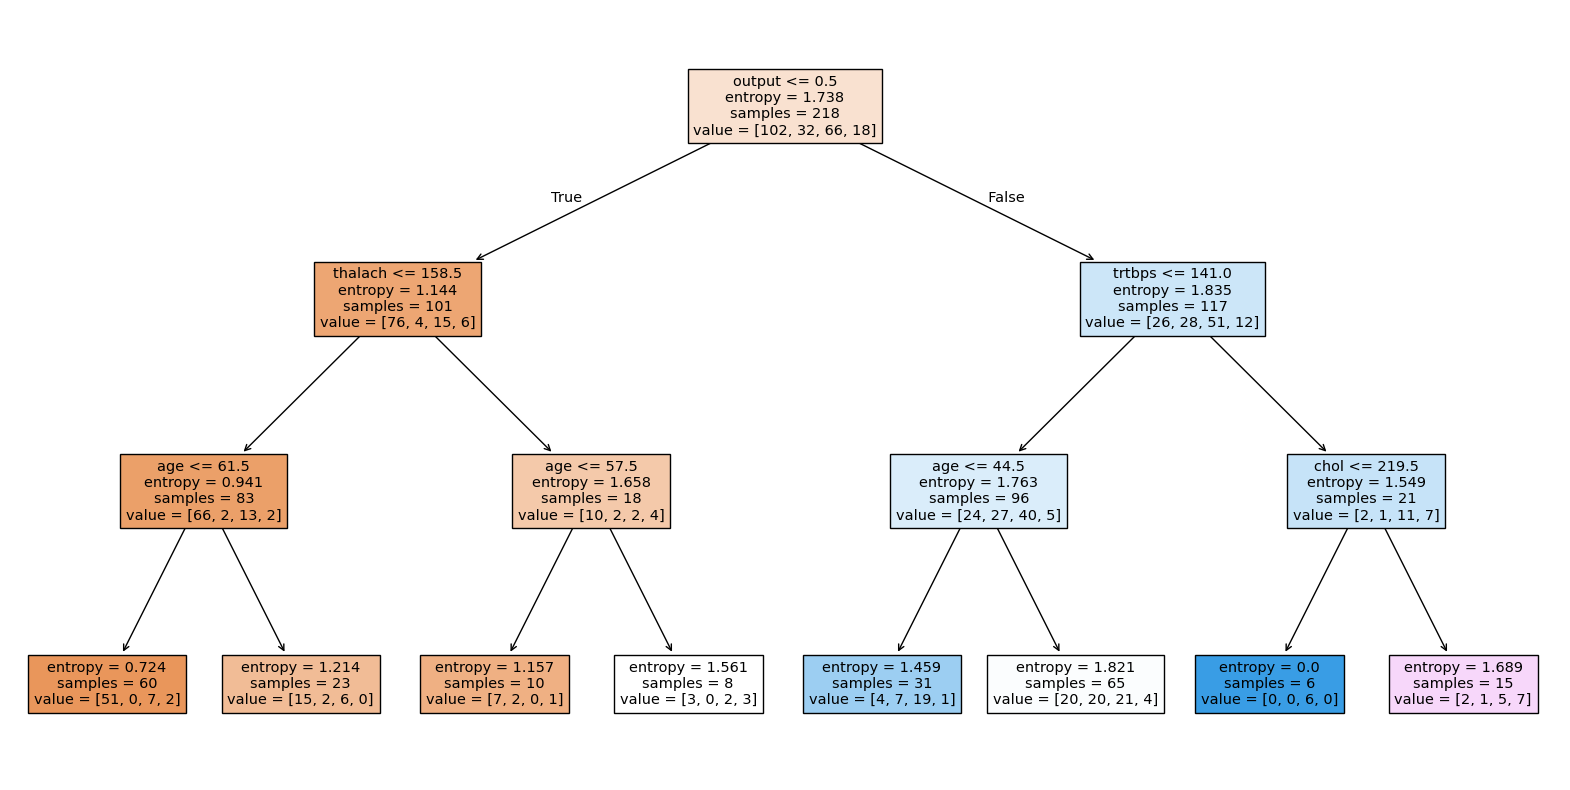

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(grid_tree.best_estimator_, feature_names=X.columns.tolist(), filled=True)
plt.show()

In [43]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_pipe = Pipeline([
    ('scaling', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis())
])

grid_lda = GridSearchCV(lda_pipe, {}, cv=5)
grid_lda.fit(Xt, yt)

lda_pred = grid_lda.predict(Xv)
print('lda accuracy', accuracy_score(yv, lda_pred))
print('classification report', classification_report(yv, lda_pred))

lda accuracy 0.5454545454545454
classification report               precision    recall  f1-score   support

           0       0.69      0.77      0.73        26
           1       0.00      0.00      0.00        12
           2       0.42      0.67      0.51        15
           3       0.00      0.00      0.00         2

    accuracy                           0.55        55
   macro avg       0.28      0.36      0.31        55
weighted avg       0.44      0.55      0.48        55



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [9]:
ha["cp_is_3"] = (ha["cp"] == 3) * 1
ha["cp_is_2"] = (ha["cp"] == 2) * 1
ha["cp_is_1"] = (ha["cp"] == 1) * 1
ha["cp_is_0"] = (ha["cp"] == 0) * 1

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import pandas as pd

X = ha[['age', 'sex', 'trtbps', 'chol', 'thalach']]
y = ha['cp_is_3']

logit = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=2000))
])

logit.fit(X, y)
y_pred = logit.predict(X)

f1_3 = f1_score(y, y_pred)
print('f1 score for cp:', f1_3)

f1 score for cp: 0.0


In [12]:
X = ha[['age', 'sex', 'trtbps', 'chol', 'thalach']]
y = ha['cp_is_2']

logit = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=2000))
])

logit.fit(X, y)
y_pred = logit.predict(X)

f1_3 = f1_score(y, y_pred)
print('f1 score for cp:', f1_3)

f1 score for cp: 0.10869565217391304


In [13]:
X = ha[['age', 'sex', 'trtbps', 'chol', 'thalach']]
y = ha['cp_is_1']

logit = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=2000))
])

logit.fit(X, y)
y_pred = logit.predict(X)

f1_3 = f1_score(y, y_pred)
print('f1 score for cp:', f1_3)

f1 score for cp: 0.0


In [14]:
X = ha[['age', 'sex', 'trtbps', 'chol', 'thalach']]
y = ha['cp_is_0']

logit = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=2000))
])

logit.fit(X, y)
y_pred = logit.predict(X)

f1_3 = f1_score(y, y_pred)
print('f1 score for cp:', f1_3)

f1 score for cp: 0.625


The OvR method performed best for chest pain type 0, meaning that this type is the most seaparable from the other using the clinical predictors.

## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [24]:
from sklearn.model_selection import cross_val_score

ha0_1 = ha[(ha['cp'] == 0) | (ha['cp'] == 1)]

X = ha0_1[['age', 'sex', 'trtbps', 'chol', 'thalach']]
y = ha0_1['cp']

logit = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=2000))
])

logit.fit(X, y)
y_pred = logit.predict(X)

cross_val_score(logit, X, y, cv=5, scoring="roc_auc").mean()


np.float64(0.7599487179487181)

In [26]:
ha0_2 = ha[(ha['cp'] == 0) | (ha['cp'] == 2)]

X = ha0_2[['age', 'sex', 'trtbps', 'chol', 'thalach']]
y = ha0_2['cp']

logit = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=2000))
])

logit.fit(X, y)
y_pred = logit.predict(X)

cross_val_score(logit, X, y, cv=5, scoring="roc_auc").mean()

np.float64(0.6671470588235293)

In [27]:
ha0_3 = ha[(ha['cp'] == 0) | (ha['cp'] == 3)]

X = ha0_3[['age', 'sex', 'trtbps', 'chol', 'thalach']]
y = ha0_3['cp']

logit = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=2000))
])

logit.fit(X, y)
y_pred = logit.predict(X)

cross_val_score(logit, X, y, cv=5, scoring="roc_auc").mean()

np.float64(0.708923076923077)

The pair that the OvO was best at distinguishing was between asymptomatic and low chest pain.